<a href="https://colab.research.google.com/github/pinakiweb/fake-review-detection/blob/main/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings

warnings.filterwarnings('ignore')

In [ ]:
dataUP = pd.read_csv('/content/drive/MyDrive/SWM/dataAll.csv')
print(dataUP.shape)
dataUP

(359052, 19)


,userid,productid,polarity,subjectivity,wordCount,stdrating,clusterid,meanSimilarity,varOfSimilarity,meanRating,numberOfReviews,avgNoOfWords,totalReviews,isSingleton,posReviewRatio,negReviewRatio,avgNoOfReviews,maxNoOfReviews,dateVariance
0,923,0,0.195833,0.395833,143,0.896514,141,0.043510,0.005451,4.009524,210,37.410256,39,0,0.974359,0.025641,1.625000,3,136.039474
1,924,0,0.025000,0.650000,163,0.896514,74,0.067578,0.005659,4.009524,210,27.000000,1,1,1.000000,0.000000,1.000000,1,NaN
2,925,0,0.220000,0.328718,115,0.896514,167,0.047143,0.005273,4.009524,210,22.000000,2,0,1.000000,0.000000,2.000000,2,0.000000
3,926,0,0.555134,0.776786,315,0.896514,378,0.076343,0.005720,4.009524,210,52.000000,1,1,1.000000,0.000000,1.000000,1,NaN
4,927,0,0.138715,0.538294,420,0.896514,992,0.062976,0.005454,4.009524,210,86.200000,5,0,0.800000,0.200000,1.000000,1,26.187500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359047,161146,349,0.388788,0.577778,909,1.193034,574,0.135047,0.009530,4.185185,108,167.000000,1,1,1.000000,0.000000,1.000000,1,NaN
359048,116424,349,0.564583,0.688889,319,1.193034,520,0.075975,0.009418,4.185185,108,34.500000,2,0,1.000000,0.000000,1.000000,1,0.000000
359049,161147,349,0.354545,0.517172,188,1.193034,520,0.082728,0.009447,4.185185,108,33.000000,1,1,1.000000,0.000000,1.000000,1,NaN
359050,97930,349,0.616667,0.666667,104,1.193034,966,0.082854,0.009971,4.185185,108,29.500000,2,0,1.000000,0.000000,1.000000,1,0.000000


In [ ]:
dataF = pd.read_csv('/content/drive/MyDrive/SWM/featuresAll.csv')
print(dataF.shape)
dataF

(359052, 17)


,polarity,subjectivity,wordCount,stdrating,clusterid,meanSimilarity,varOfSimilarity,meanRating,numberOfReviews,avgNoOfWords,totalReviews,isSingleton,posReviewRatio,negReviewRatio,avgNoOfReviews,maxNoOfReviews,dateVariance
0,0.195833,0.395833,143,0.896514,141,0.043510,0.005451,4.009524,210,37.410256,39,0,0.974359,0.025641,1.625000,3,1.360395e+02
1,0.025000,0.650000,163,0.896514,74,0.067578,0.005659,4.009524,210,27.000000,1,1,1.000000,0.000000,1.000000,1,2.003740e+06
2,0.220000,0.328718,115,0.896514,167,0.047143,0.005273,4.009524,210,22.000000,2,0,1.000000,0.000000,2.000000,2,0.000000e+00
3,0.555134,0.776786,315,0.896514,378,0.076343,0.005720,4.009524,210,52.000000,1,1,1.000000,0.000000,1.000000,1,2.003740e+06
4,0.138715,0.538294,420,0.896514,992,0.062976,0.005454,4.009524,210,86.200000,5,0,0.800000,0.200000,1.000000,1,2.618750e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359047,0.388788,0.577778,909,1.193034,574,0.135047,0.009530,4.185185,108,167.000000,1,1,1.000000,0.000000,1.000000,1,2.003740e+06
359048,0.564583,0.688889,319,1.193034,520,0.075975,0.009418,4.185185,108,34.500000,2,0,1.000000,0.000000,1.000000,1,0.000000e+00
359049,0.354545,0.517172,188,1.193034,520,0.082728,0.009447,4.185185,108,33.000000,1,1,1.000000,0.000000,1.000000,1,2.003740e+06
359050,0.616667,0.666667,104,1.193034,966,0.082854,0.009971,4.185185,108,29.500000,2,0,1.000000,0.000000,1.000000,1,0.000000e+00


In [ ]:
label = pd.read_csv('/content/drive/MyDrive/SWM/labels.csv')
print(label.shape)
label

(359052, 1)


,label
0,1
1,1
2,1
3,1
4,1
...,...
359047,0
359048,0
359049,0
359050,0


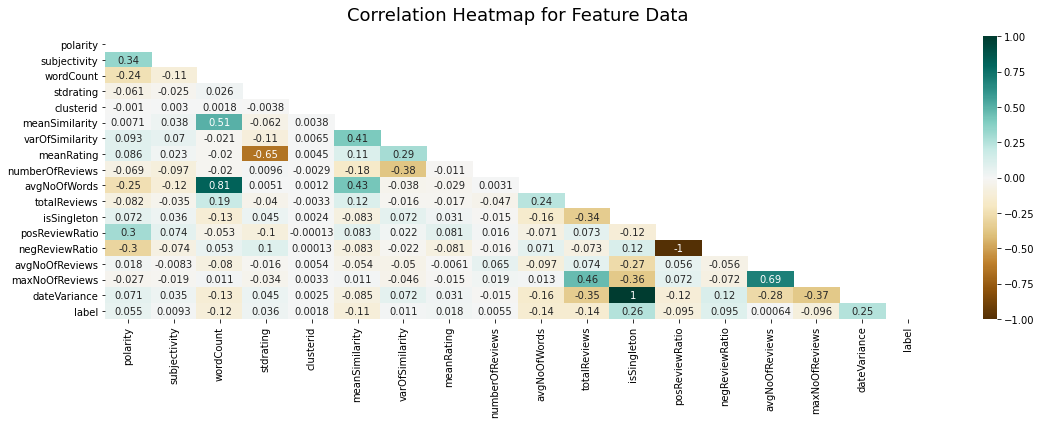

In [ ]:
dataF['label'] = label
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(dataF.corr(), dtype=np.bool))
heatmap = sns.heatmap(dataF.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap for Feature Data', fontdict={'fontsize':18}, pad=16)
plt.tight_layout()
plt.savefig('correlationF.png')
plt.show()

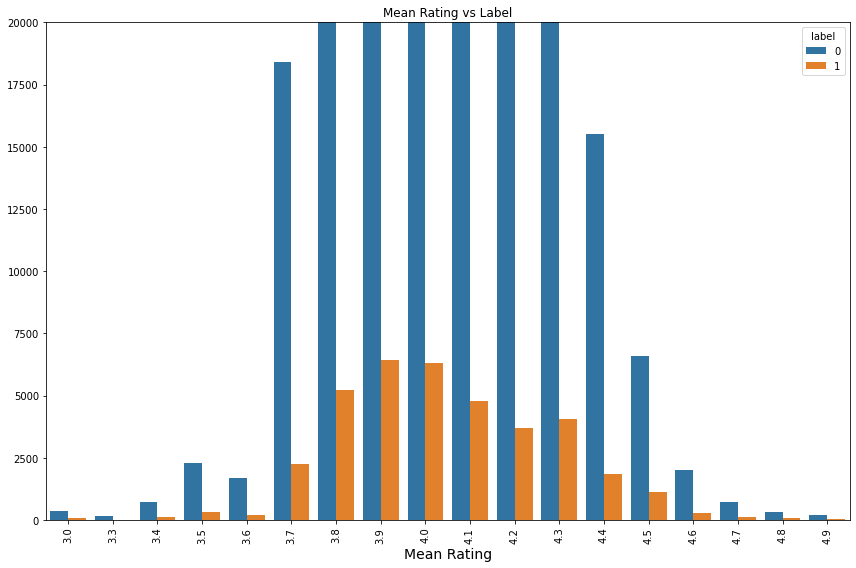

In [ ]:
fig = plt.figure(figsize = (12,8))
ax=sns.countplot(np.round(dataF['meanRating'], 1), hue=dataF['label'])
ax.set_title('Mean Rating vs Label')
plt.xlabel("Mean Rating",fontsize = 14)
plt.xticks(rotation=90)
plt.ylim(0, 20000)
plt.ylabel('')
plt.tight_layout()
plt.savefig('ratingvlabel.png')
plt.show()

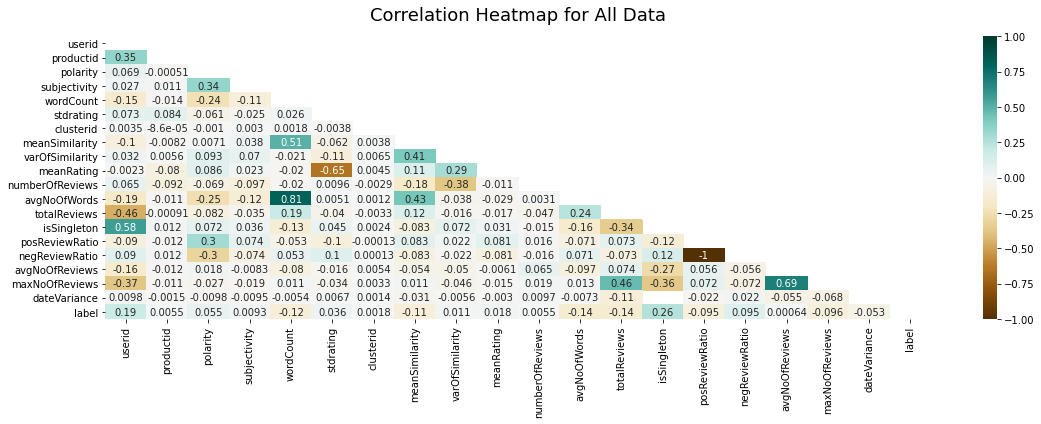

In [ ]:
dataUP['label'] = label
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(dataUP.corr(), dtype=np.bool))
heatmap = sns.heatmap(dataUP.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap for All Data', fontdict={'fontsize':18}, pad=16)
plt.tight_layout()
plt.savefig('correlationAll.png')
plt.show()

In [ ]:
dataF.describe()

,polarity,subjectivity,wordCount,stdrating,clusterid,meanSimilarity,varOfSimilarity,meanRating,numberOfReviews,avgNoOfWords,totalReviews,isSingleton,posReviewRatio,negReviewRatio,avgNoOfReviews,maxNoOfReviews,dateVariance,label
count,359052.000000,359052.000000,359052.000000,359052.000000,359052.000000,359052.000000,359052.000000,359052.000000,359052.000000,359052.000000,359052.000000,359052.000000,359052.000000,359052.000000,359052.000000,359052.000000,3.590520e+05,359052.000000
mean,0.265094,0.573327,402.788992,1.027285,496.442237,0.056573,0.003644,4.025871,1224.283001,69.155011,9.861574,0.295214,0.902524,0.097476,1.254435,1.811991,6.077269e+05,0.102729
std,0.200309,0.133029,364.042915,0.113602,287.522313,0.020262,0.003484,0.218221,1484.500119,50.843597,16.671705,0.456139,0.226374,0.226374,0.603036,1.448682,9.053614e+05,0.303605
min,-1.000000,0.000000,0.000000,0.235702,0.000000,0.000000,0.000000,2.984163,11.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000e+00,0.000000
25%,0.146488,0.500505,161.000000,0.964518,247.000000,0.042568,0.001831,3.872340,344.000000,33.000000,1.000000,0.000000,0.923077,0.000000,1.000000,1.000000,6.743406e+02,0.000000
50%,0.252273,0.571970,299.000000,1.029827,493.000000,0.055630,0.002685,3.990777,717.000000,58.000000,3.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.115314e+04,0.000000
75%,0.370916,0.646667,526.000000,1.103651,743.000000,0.069551,0.004163,4.157591,1444.000000,92.000000,10.000000,1.000000,1.000000,0.076923,1.269231,2.000000,2.003740e+06,0.000000
max,1.000000,1.000000,4539.000000,1.435687,999.000000,0.214536,0.099309,4.944444,7378.000000,720.000000,181.000000,1.000000,1.000000,1.000000,19.000000,25.000000,2.003740e+06,1.000000


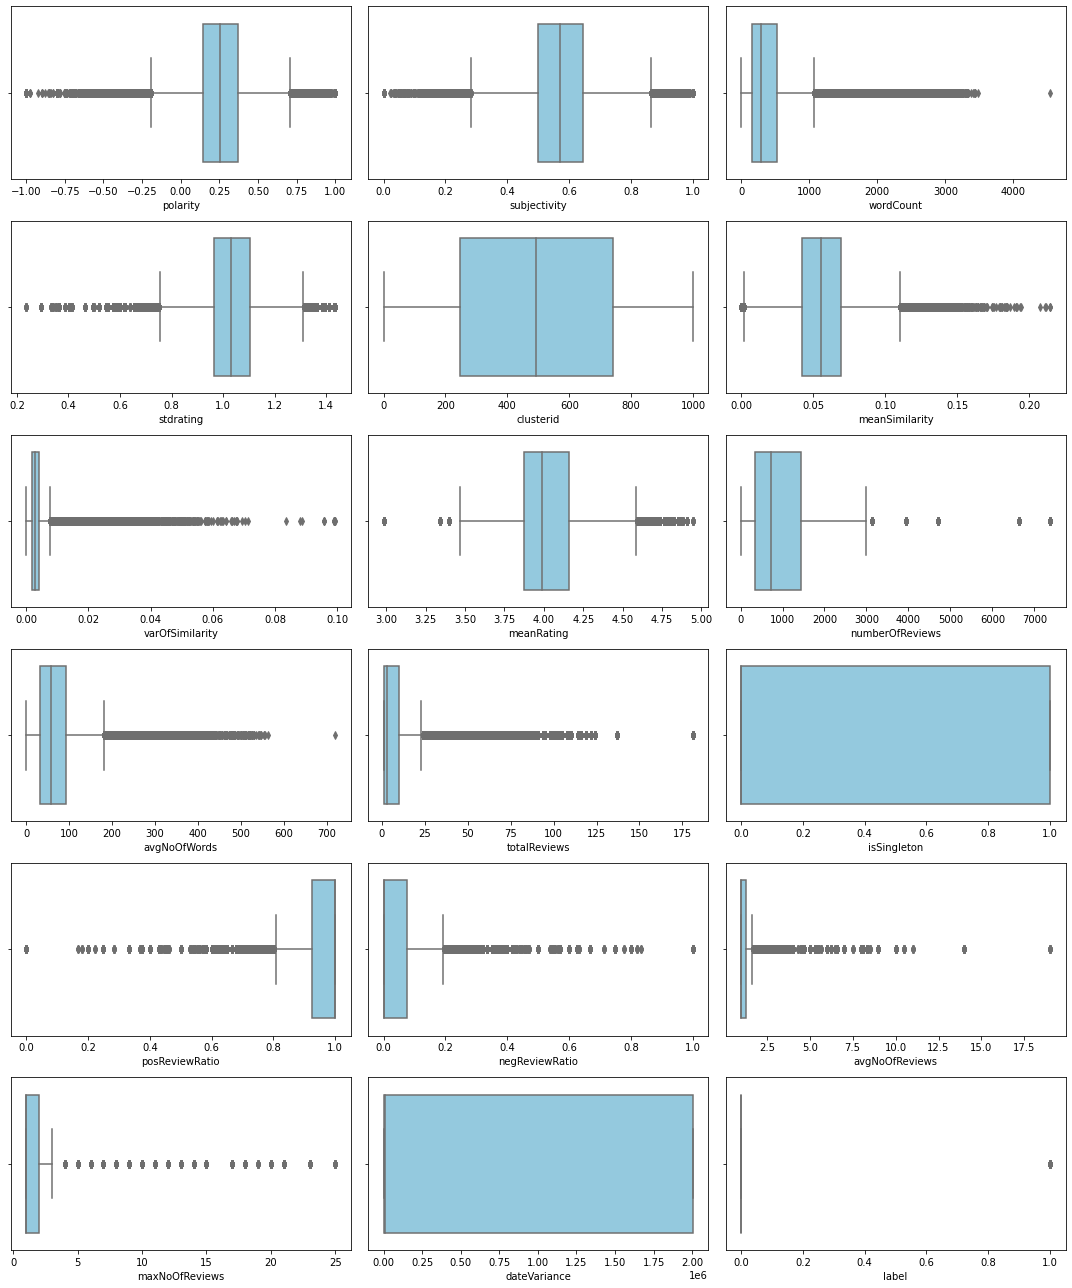

In [ ]:
#dataF = dataF.drop(columns= ['label'])
cols = dataF.columns.to_list()
k = len(cols)
n = 3
m = (k - 1) // n + 1
fig, axes = plt.subplots(m, n, figsize=(n * 5, m * 3))
for i, (name, col) in enumerate(dataF.iteritems()):
    r, c = i // n, i % n
    ax = axes[r, c]
    sns.boxplot(dataF[cols[i]], color = 'skyblue', ax = ax)
#plt.suptitle('Boxplot for Columns')
plt.tight_layout()
plt.savefig('boxplot.png')
plt.show()

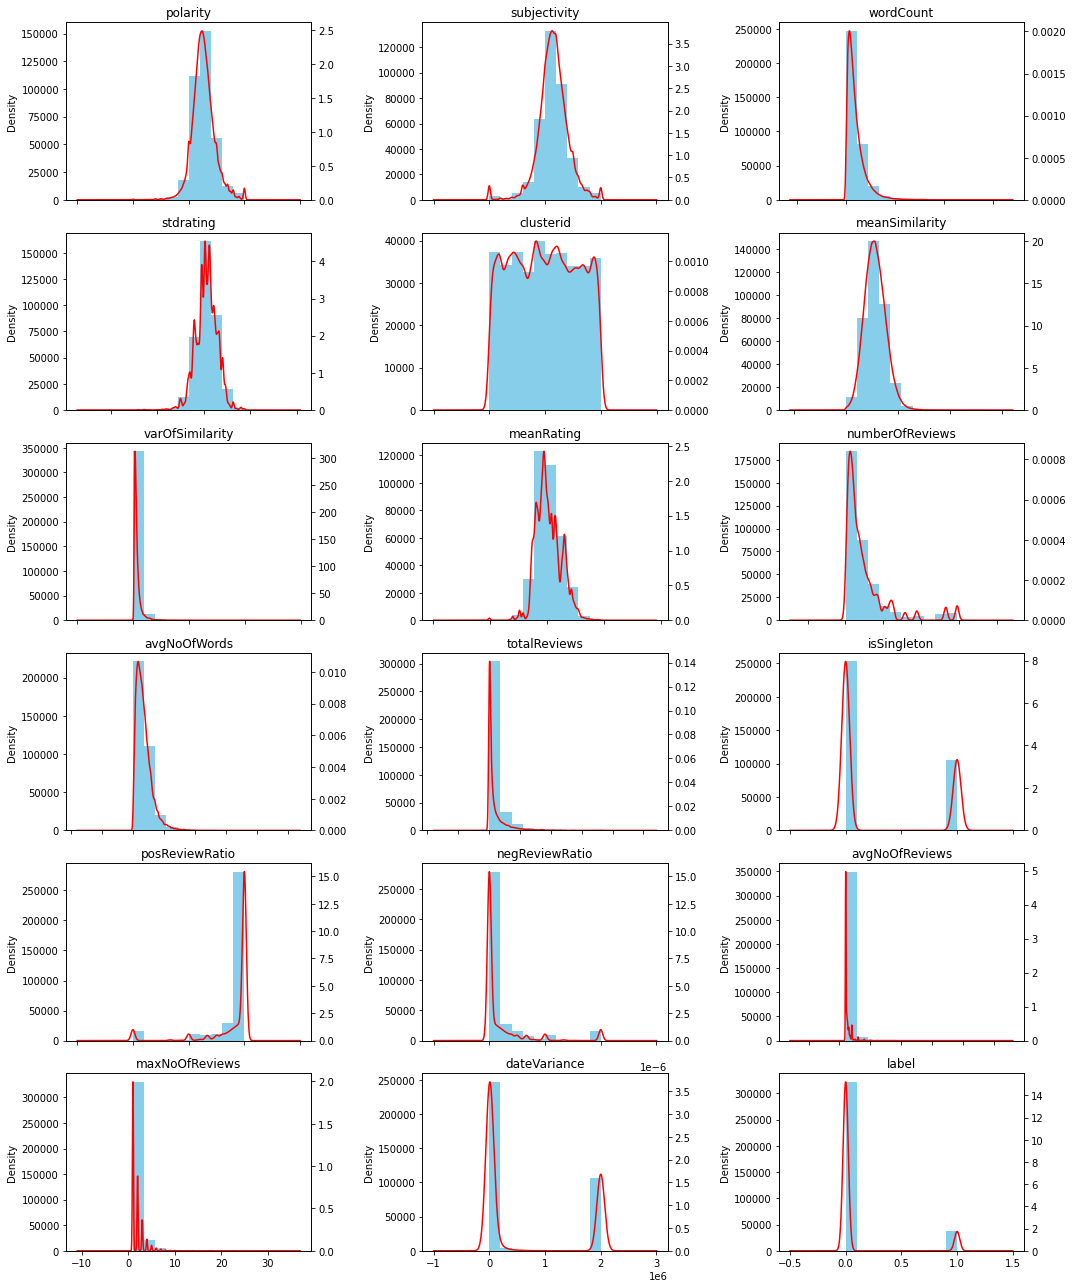

In [ ]:
k = len(cols)
n = 3
m = (k - 1) // n + 1
fig, axes = plt.subplots(m, n, figsize=(n * 5, m * 3))
for i, (name, col) in enumerate(dataF.iteritems()):
    r, c = i // n, i % n
    ax = axes[r, c]
    col.hist(ax=ax, color='skyblue')
    ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name, color='red')
    ax2.set_ylim(0)
#plt.suptitle('Histrogram Distribution for Integer Columns')
plt.tight_layout()
plt.savefig('histogram.png')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold 
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn import metrics

dataF = dataF.sample(frac=1).reset_index(drop=True)
X = dataF.drop(columns = ['label'])
y = dataF['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
clf = svm.SVC()
cv = ShuffleSplit(n_splits=5, test_size=0.2)
CVscore = cross_val_score(clf, X_train, y_train, cv = cv, verbose = 7, n_jobs = -1)
print(CVscore)

(287241, 17) (287241,) (71811, 17) (71811,)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  1.3min remaining:   51.9s


[0.09 0.33 0.09 0.09 0.09]


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.7min finished


In [ ]:
clf.fit(X_train, y_train)

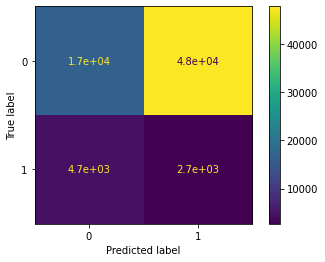

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import numpy as np
#y_test_pred = clf.predict(X_test)
# Get the confusion matrix
plot_confusion_matrix(clf, X_test, y_test)
plt.show()